<a href="https://colab.research.google.com/github/Livi-Arbo/BME-DS-Notes/blob/main/Data_Science_Notes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Lecture 8/30
##Data cleaning by example

In [2]:
import pandas as pd
import numpy as np
import matplotlib as mpl

when using pandas, only use "as" something as a known acronym, not your own abbreviations. ie: pd for pandas

mri image cloud dataset is being read in.

In [4]:
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby127a_3_1_ax_283Labels_M2_corrected_stats.csv")

In [5]:
df.head(4)


,Unnamed: 0,rawid,roi,volume,min,max,mean,std,type,level
0,1,kirby127a_3_1_ax.img,Telencephalon_L,531111,0,374,128.3013,51.8593,1,1
1,2,kirby127a_3_1_ax.img,Telencephalon_R,543404,0,300,135.0683,53.6471,1,1
2,3,kirby127a_3_1_ax.img,Diencephalon_L,9683,15,295,193.5488,32.2733,1,1
3,4,kirby127a_3_1_ax.img,Diencephalon_R,9678,10,335,193.7051,32.7869,1,1


In [6]:
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)

if one were to do df['roi'] it would only reference the doi column.

The columns rawid, unnamed, and everything but volume are removed. Then, "intra-cranial volume" (icv) is created.


.loc finds specific elements: here, df is searched for type == 1, and for level == 1. Both the searches are contained in the brackets for df.loc[......]

instead of df.type, df['type'] will ALWAYS find the variable searched for, whereas the . method can overlap with built-in commands

In [16]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]
## Create a new column based on ICV
t1l1 = t1l1.assign(icv = sum(t1l1.volume))
t1l1

,roi,volume,type,level,icv
0,Telencephalon_L,531111,1,1,1378295
1,Telencephalon_R,543404,1,1,1378295
2,Diencephalon_L,9683,1,1,1378295
3,Diencephalon_R,9678,1,1,1378295
4,Mesencephalon,10268,1,1,1378295
5,Metencephalon,159402,1,1,1378295
6,Myelencephalon,4973,1,1,1378295
7,CSF,109776,1,1,1378295


calculating the total brain volume

In [9]:
t1l1 = t1l1.assign(tbv = sum(t1l1.volume[(t1l1.roi != 'CSF')]))
t1l1

,roi,volume,type,level,icv,tbv
0,Telencephalon_L,531111,1,1,1378295,1268519
1,Telencephalon_R,543404,1,1,1378295,1268519
2,Diencephalon_L,9683,1,1,1378295,1268519
3,Diencephalon_R,9678,1,1,1378295,1268519
4,Mesencephalon,10268,1,1,1378295,1268519
5,Metencephalon,159402,1,1,1378295,1268519
6,Myelencephalon,4973,1,1,1378295,1268519
7,CSF,109776,1,1,1378295,1268519


In [17]:
sum(t1l1['volume'][t1l1['roi'] != 'CSF'])

1268519

comp: the percent as a decimal of the total brain volume

In [10]:
t1l1 = t1l1.assign(comp = lambda x: x.volume / x.tbv)
t1l1

,roi,volume,type,level,icv,tbv,comp
0,Telencephalon_L,531111,1,1,1378295,1268519,0.418686
1,Telencephalon_R,543404,1,1,1378295,1268519,0.428377
2,Diencephalon_L,9683,1,1,1378295,1268519,0.007633
3,Diencephalon_R,9678,1,1,1378295,1268519,0.007629
4,Mesencephalon,10268,1,1,1378295,1268519,0.008094
5,Metencephalon,159402,1,1,1378295,1268519,0.125660
6,Myelencephalon,4973,1,1,1378295,1268519,0.003920
7,CSF,109776,1,1,1378295,1268519,0.086539


the plot.bar function automatically creates the plot with pandas

<Axes: xlabel='roi'>

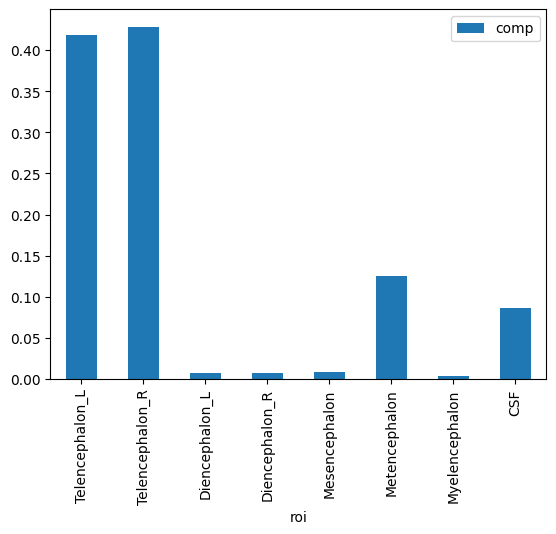

In [12]:
t1l1.plot.bar(x='roi',y='comp')


In [18]:
#!pip install plotly==4.0.0

installs an interactive plotting function

In [25]:
import plotly.express as px
myplot = px.bar(t1l1, x='roi', y='volume')
myplot.show()

myplot object can be stored as an html or a png etc... to be stored or moved

##Exploratory Data Analysis

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
## this sets some style parameters
sns.set()

add in the csv file but drop the unnecessary columns before import

In [28]:
## Reading it in, keeping only volume
df = pd.read_csv("https://raw.githubusercontent.com/bcaffo/ds4bme_intro/master/data/kirby21.csv")
df = df.drop(['Unnamed: 0', 'rawid', 'min', 'max', 'mean', 'std'],\
             axis = 1)
df.head(4)

,roi,volume,type,level,id,icv,tbv
0,Telencephalon_L,531111,1,1,127,1378295,1268519
1,Telencephalon_R,543404,1,1,127,1378295,1268519
2,Diencephalon_L,9683,1,1,127,1378295,1268519
3,Diencephalon_R,9678,1,1,127,1378295,1268519


In [29]:
## Extract the Type 1 Level 1 data
t1l1 = df.loc[(df.type == 1) & (df.level == 1)]

summary line just selects the columns of interest.
groupby is used to get the roi as the column rather than a row-lable for the following command

In [30]:
## create a composition variable
t1l1 = t1l1.assign(comp = t1l1.volume / t1l1.tbv)
t1l1 = t1l1.loc[t1l1.roi != 'CSF']
## get the mean of the composition variable across
## subjects by ROI
summary = t1l1[['roi', 'comp']].groupby('roi', as_index=False).mean()
print(summary)

               roi      comp
0   Diencephalon_L  0.007563
1   Diencephalon_R  0.007634
2    Mesencephalon  0.008647
3    Metencephalon  0.124883
4   Myelencephalon  0.003785
5  Telencephalon_L  0.420305
6  Telencephalon_R  0.427184


(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Diencephalon_L'),
  Text(1, 0, 'Diencephalon_R'),
  Text(2, 0, 'Mesencephalon'),
  Text(3, 0, 'Metencephalon'),
  Text(4, 0, 'Myelencephalon'),
  Text(5, 0, 'Telencephalon_L'),
  Text(6, 0, 'Telencephalon_R')])

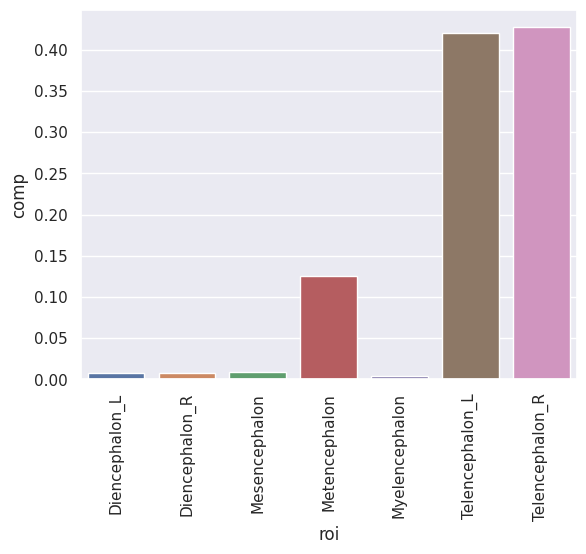

In [31]:
g = sns.barplot(x='roi', y = 'comp', data = summary)
## this is the matplotlib command for rotating
## axis tick labels by 90 degrees.
plt.xticks(rotation = 90)

In [32]:
t1l1pivot = t1l1.pivot(index = 'id', columns = 'roi', values = 'volume')
t1l1pivot.head(4)

roi,Diencephalon_L,Diencephalon_R,Mesencephalon,Metencephalon,Myelencephalon,Telencephalon_L,Telencephalon_R
id,,,,,,,
127,9683,9678,10268,159402,4973,531111,543404
142,9156,9071,10516,165803,4912,545603,552216
239,8937,9004,9070,124504,4023,483107,490805
346,8828,8933,9788,135090,4428,558849,568830


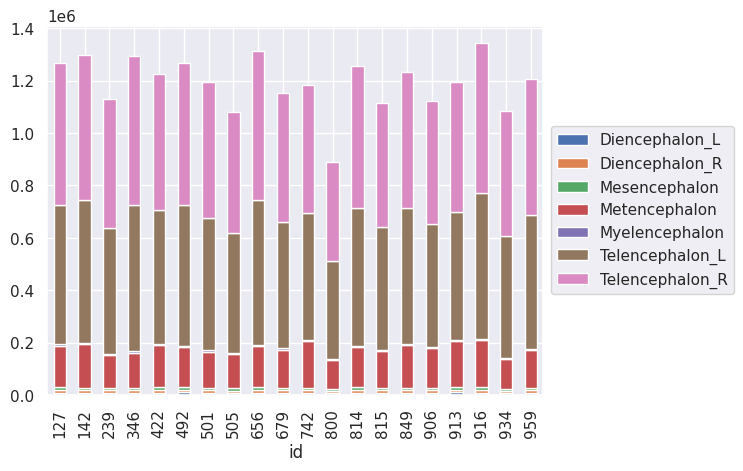

In [33]:
t1l1pivot.plot(kind='bar', stacked=True, legend= False)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

#Discussion 9/1 @ 11am